In [5]:
!pip install pandas matplotlib wordcloud keras tensorflow


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

In [8]:
# Load data
df = pd.read_csv('dataset/Sentiment140.csv', encoding='latin-1', header=None, names=['target', 'id', 'date', 'flag', 'user', 'text'])

df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
# Clean data
def clean_text(text):
    text = re.sub(r'[^A-Za-z0-9]', ' ', text)
    text = text.lower()
    return text

df['text'] = df['text'].apply(clean_text)

In [17]:
# Tokenize data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])

# Get the maximum sequence length
maxlen = max([len(seq) for seq in tokenizer.texts_to_sequences(df['text'])])

X = tokenizer.texts_to_sequences(df['text'])
X = pad_sequences(X, maxlen=maxlen)

In [18]:
# Split into train/test
X_train, X_test = X[:1500000], X[1500000:]
y_train, y_test = df['target'][:1500000], df['target'][1500000:]

In [19]:
# Build model 
model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=512)

Epoch 1/10
2930/2930 [==============================] - 418s 142ms/step - loss: -134.7204 - accuracy: 9.9333e-05 - val_loss: -861.1505 - val_accuracy: 0.0000e+00
Epoch 2/10
2930/2930 [==============================] - 386s 132ms/step - loss: -448.2659 - accuracy: 0.0599 - val_loss: -1576.9109 - val_accuracy: 0.0000e+00
Epoch 3/10
2930/2930 [==============================] - 359s 122ms/step - loss: -767.3175 - accuracy: 0.0956 - val_loss: -2375.3616 - val_accuracy: 0.0000e+00
Epoch 4/10
2930/2930 [==============================] - 424s 145ms/step - loss: -1093.4762 - accuracy: 0.1255 - val_loss: -3207.2417 - val_accuracy: 0.0000e+00
Epoch 5/10
2930/2930 [==============================] - 355s 121ms/step - loss: -1371.2537 - accuracy: 0.1578 - val_loss: -3798.1201 - val_accuracy: 0.0000e+00
Epoch 6/10
2930/2930 [==============================] - 363s 124ms/step - loss: -1672.6730 - accuracy: 0.1693 - val_loss: -4638.4375 - val_accuracy: 0.0000e+00
Epoch 7/10
2930/2930 [==================

In [20]:
# Calculate accuracy
accuracy = model.evaluate(X_test, y_test)[1]
print(accuracy)

3125/3125 [==============================] - 22s 7ms/step - loss: -7967.8662 - accuracy: 0.0000e+00
0.0


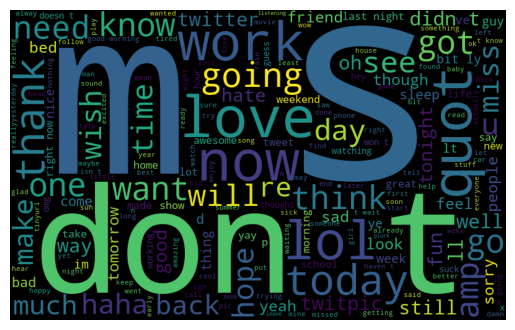

In [22]:
# Wordcloud 
words = ' '.join(df['text'])
wordcloud = WordCloud(width=800, height=500).generate(words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
# Function to predict sentiment of a new statement
def predict_sentiment(text):
    review = [text]
    review = tokenizer.texts_to_sequences(review)
    review = pad_sequences(review, maxlen=maxlen)
    pred = model.predict(review)
    
    if round(pred[0,0]) == 1:
        print('Positive sentiment')
    else: 
        print('Negative sentiment')

In [24]:
# Example       
text = "I love this movie!"
predict_sentiment(text) # Positive sentiment

text = "I hate this movie!" 
predict_sentiment(text) # Negative sentiment 

1/1 [==============================] - 0s 499ms/step
Positive sentiment
1/1 [==============================] - 0s 16ms/step
Positive sentiment
